In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, l1_l2

## Import train and test images

In [2]:
train_gen = ImageDataGenerator(rescale = 1 / 255.)

train_data = train_gen.flow_from_directory('./train',
                                           batch_size = 7017,#14034
                                          target_size = (150,150),
                                          color_mode = 'rgb')
test_data = train_gen.flow_from_directory('./val',
                                          batch_size = 1500,#3000
                                          target_size = (150,150),
                                         color_mode = 'rgb')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [3]:
# making the train data and train labels variables using generator
train_data, train_labels = train_data.next()

#Observe
train_data.shape # (7017, 150, 150, 3)
train_labels.shape #(7017, 6)

# making the test data and test labels variables
test_data, test_labels = test_data.next()

#Observe
test_data.shape #(1500, 150, 150, 3)
test_labels.shape #(1500, 6)

(1500, 6)

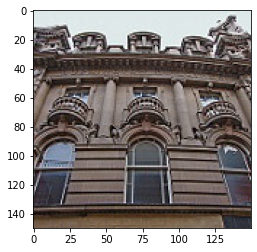

In [4]:
test_building = plt.imread('./train/buildings/990.jpg')
plt.imshow(test_building)

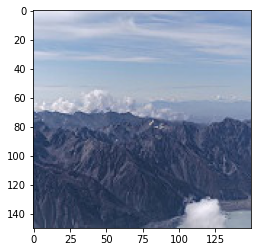

In [5]:
test_mountain = plt.imread('./train/mountain/9779.jpg')
plt.imshow(test_mountain)

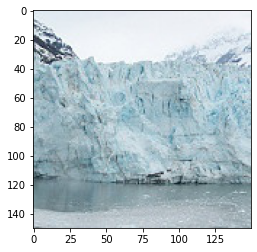

In [6]:
test_glacier = plt.imread('./train/glacier/998.jpg')
plt.imshow(test_glacier)

## Create a baseline model 

In [7]:
# baseline model

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(6, activation = 'softmax'))

#compile
model1.compile(loss = 'categorical_crossentropy', 
               optimizer = 'adam', 
               metrics = ['accuracy'])

# fit
history1 = model1.fit(train_data, 
           train_labels, 
           validation_data = (test_data, test_labels)
          )

220/220 [==============================] - 7s 30ms/step - loss: 4.9040 - accuracy: 0.3638 - val_loss: 2.5595 - val_accuracy: 0.3727


Our baseline accuracy to beat is 38% validation accuracy

In [8]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(6, activation = 'softmax'))

#compile
model2.compile(loss = 'categorical_crossentropy', 
               optimizer = 'adam', 
               metrics = ['accuracy'])

# fit
model2.fit(train_data, 
           train_labels, 
           validation_data = (test_data, test_labels)
          )

220/220 [==============================] - 5s 20ms/step - loss: 2.8421 - accuracy: 0.3489 - val_loss: 1.8409 - val_accuracy: 0.5007


Adding another dense layer doesn't increase validatoin accuracy but the validation loss has decreased

In [9]:
# add more layers and more epochs

model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(20, activation = 'relu'))
model3.add(Dense(30, activation = 'relu'))
model3.add(Dense(6, activation = 'softmax'))

#compile
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit
history3 = model3.fit(train_data, train_labels, validation_data = (test_data, test_labels), epochs = 10)

Epoch 1/10
220/220 [==============================] - 5s 21ms/step - loss: 2.1517 - accuracy: 0.3449 - val_loss: 1.4041 - val_accuracy: 0.4433
Epoch 2/10
220/220 [==============================] - 4s 19ms/step - loss: 1.4104 - accuracy: 0.4629 - val_loss: 1.2968 - val_accuracy: 0.5253
Epoch 3/10
220/220 [==============================] - 4s 19ms/step - loss: 1.3522 - accuracy: 0.4853 - val_loss: 1.3014 - val_accuracy: 0.5073
Epoch 4/10
220/220 [==============================] - 8s 34ms/step - loss: 1.3290 - accuracy: 0.4858 - val_loss: 1.4451 - val_accuracy: 0.4593
Epoch 5/10
220/220 [==============================] - 5s 24ms/step - loss: 1.2647 - accuracy: 0.5056 - val_loss: 1.4326 - val_accuracy: 0.4267
Epoch 6/10
220/220 [==============================] - 4s 20ms/step - loss: 1.2295 - accuracy: 0.5287 - val_loss: 1.4054 - val_accuracy: 0.4813
Epoch 7/10
220/220 [==============================] - 4s 19ms/step - loss: 1.2170 - accuracy: 0.5348 - val_loss: 1.5890 - val_accuracy: 0.3773

50 additional dense layers are added but this time they're seperatated between 20 & 30, also more epochs were added to allow for more time to learn

In [10]:
# add early stop

early_stop = EarlyStopping(monitor='val_accuracy', patience=2)

model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(20, activation = 'relu'))
model4.add(Dense(30, activation = 'relu'))
model4.add(Dense(6, activation = 'softmax'))

#compile
model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit
history4 = model4.fit(train_data, train_labels, validation_data = (test_data, test_labels), epochs = 10, callbacks=[early_stop])

Epoch 1/10
220/220 [==============================] - 5s 19ms/step - loss: 2.1891 - accuracy: 0.1838 - val_loss: 1.7907 - val_accuracy: 0.1773
Epoch 2/10
220/220 [==============================] - 5s 22ms/step - loss: 1.7901 - accuracy: 0.1880 - val_loss: 1.7896 - val_accuracy: 0.1773
Epoch 3/10
220/220 [==============================] - 4s 19ms/step - loss: 1.7897 - accuracy: 0.1880 - val_loss: 1.7892 - val_accuracy: 0.1773


Model 4 is the same as model 3, except it includes early stopping to save on run time when fitting. It monitors the val accuracy and has a patience of 2 which means once val accuracy hasn't changed after 2 training cycles, the model stops the training process. The performaces are the same!

In [11]:
# add kernel_regularizers

model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu', kernel_regularizer = l2(0.2)))
model5.add(Dense(20, activation = 'relu', kernel_regularizer = l2(0.01)))
model5.add(Dense(30, activation = 'relu', kernel_regularizer = l2(0.02)))
model5.add(Dense(6, activation = 'sigmoid'))

#compile
model5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit
history5 = model5.fit(train_data, train_labels, validation_data = (test_data, test_labels), epochs = 10)

Epoch 1/10
220/220 [==============================] - 8s 31ms/step - loss: 2.5762 - accuracy: 0.1790 - val_loss: 0.9326 - val_accuracy: 0.1927
Epoch 2/10
220/220 [==============================] - 7s 31ms/step - loss: 0.9664 - accuracy: 0.1908 - val_loss: 0.9909 - val_accuracy: 0.1407
Epoch 3/10
220/220 [==============================] - 7s 33ms/step - loss: 0.7604 - accuracy: 0.1940 - val_loss: 0.7078 - val_accuracy: 0.1840
Epoch 4/10
220/220 [==============================] - 7s 33ms/step - loss: 0.6741 - accuracy: 0.1985 - val_loss: 0.6356 - val_accuracy: 0.1653
Epoch 5/10
220/220 [==============================] - 7s 32ms/step - loss: 0.6130 - accuracy: 0.2126 - val_loss: 0.6165 - val_accuracy: 0.1840
Epoch 6/10
220/220 [==============================] - 7s 32ms/step - loss: 0.5792 - accuracy: 0.2227 - val_loss: 0.5677 - val_accuracy: 0.2167
Epoch 7/10
220/220 [==============================] - 7s 31ms/step - loss: 0.5542 - accuracy: 0.2384 - val_loss: 0.5447 - val_accuracy: 0.2193

Regularization is used to penalize a model when its predictions/loss are too high. In order to correct itself, the model gives more weight to features that help improve prediction accuracy and decrease loss. In this model above low l2 kernel regularization is applied to the square of the sum of the weights. The low regularization is meant to prevent overfitting (which the model isn't doing) 

In [12]:
model6 = Sequential()

model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(MaxPool2D(pool_size = (2, 2)))

model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dense(6, activation = 'softmax'))


model6.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history6 = model6.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels)
          )

Epoch 1/10
220/220 [==============================] - 21s 96ms/step - loss: 1.7267 - accuracy: 0.5377 - val_loss: 0.9005 - val_accuracy: 0.6633
Epoch 2/10
220/220 [==============================] - 21s 93ms/step - loss: 0.7637 - accuracy: 0.7232 - val_loss: 0.8353 - val_accuracy: 0.6867
Epoch 3/10
220/220 [==============================] - 21s 94ms/step - loss: 0.5329 - accuracy: 0.8206 - val_loss: 0.8108 - val_accuracy: 0.7213
Epoch 4/10
220/220 [==============================] - 21s 95ms/step - loss: 0.3681 - accuracy: 0.8839 - val_loss: 0.8672 - val_accuracy: 0.6920
Epoch 5/10
220/220 [==============================] - 21s 96ms/step - loss: 0.2347 - accuracy: 0.9340 - val_loss: 0.8709 - val_accuracy: 0.7067
Epoch 6/10
220/220 [==============================] - 23s 103ms/step - loss: 0.1546 - accuracy: 0.9638 - val_loss: 0.9185 - val_accuracy: 0.7107
Epoch 7/10
220/220 [==============================] - 22s 100ms/step - loss: 0.0914 - accuracy: 0.9836 - val_loss: 0.9874 - val_accurac

Model 6 is a convolution nueral network thats applied to the input images and also applies pooling to them. A cnn applies a filter to input images that detects edges and has an output of a feature map. The output is then fed to max pooling which resizes the feature map. We then use the same NN as model 1 to finish. The val accuracy has increased from the base

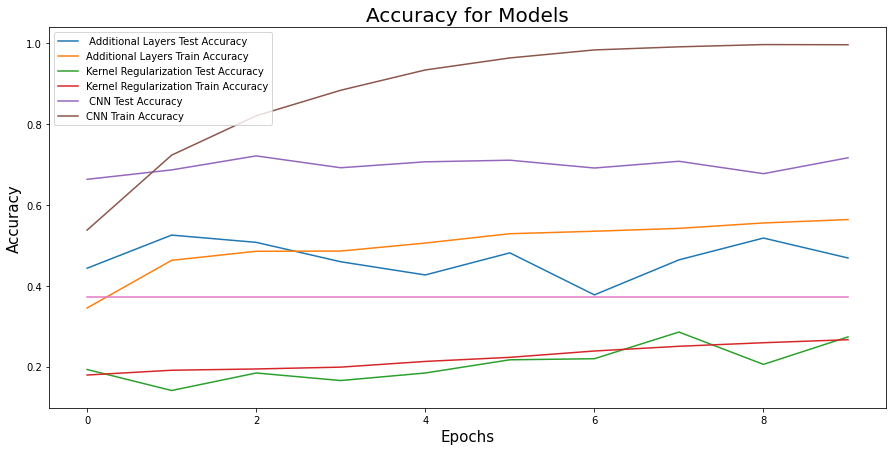

In [18]:
plt.figure(figsize=(15,7))
plt.plot(history3.history['val_accuracy'], label = ' Additional Layers Test Accuracy ')
plt.plot(history3.history['accuracy'], label = 'Additional Layers Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Kernel Regularization Test Accuracy')
plt.plot(history5.history['accuracy'], label = 'Kernel Regularization Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = ' CNN Test Accuracy')
plt.plot(history6.history['accuracy'], label = 'CNN Train Accuracy')
plt.plot(np.full_like(history6.history['val_accuracy'],history1.history['val_accuracy']))
plt.xlabel('Epochs', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.title('Accuracy for Models',size = 20)
plt.legend();

Above has the train and test accuracies for the top 3 models so far which I can work to improve on. Here we see the Model 6 (CNN + MAX POOL) had the best train and accuracy scores. Over model 3 (Base + 2 more hidden layers) and model 5 (kernel regularization). May need to be concerned about overfitting for model 6, will investigate further

In [23]:
#added drop out
model7 = Sequential()

model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D(pool_size = (2, 2)))

model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.5))
model7.add(Dense(6, activation = 'softmax'))


model7.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history7 = model7.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels)
          )

Epoch 1/10
220/220 [==============================] - 22s 97ms/step - loss: 2.0405 - accuracy: 0.2344 - val_loss: 1.4534 - val_accuracy: 0.3687
Epoch 2/10
220/220 [==============================] - 20s 91ms/step - loss: 1.5607 - accuracy: 0.2753 - val_loss: 1.4143 - val_accuracy: 0.4200
Epoch 3/10
220/220 [==============================] - 21s 94ms/step - loss: 1.4911 - accuracy: 0.3094 - val_loss: 1.2939 - val_accuracy: 0.4113
Epoch 4/10
220/220 [==============================] - 20s 92ms/step - loss: 1.4340 - accuracy: 0.3305 - val_loss: 1.2719 - val_accuracy: 0.4407
Epoch 5/10
220/220 [==============================] - 21s 97ms/step - loss: 1.3903 - accuracy: 0.3504 - val_loss: 1.2463 - val_accuracy: 0.4507
Epoch 6/10
220/220 [==============================] - 22s 98ms/step - loss: 1.3288 - accuracy: 0.4029 - val_loss: 1.1730 - val_accuracy: 0.5427
Epoch 7/10
220/220 [==============================] - 22s 102ms/step - loss: 1.2675 - accuracy: 0.4411 - val_loss: 1.1207 - val_accuracy

Model 7 is an imporvement on our best model so far. It has the convolution layer and pooling layer along with a drop out layer to remove features that aren't helping the model learn. The dropout decreases our accuracy on train and test

In [62]:
#replaced dropout with early stop
early_stop = EarlyStopping(monitor='val_accuracy', patience=2)
model8 = Sequential()

model8.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model8.add(MaxPool2D(pool_size = (2, 2)))

model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dense(6, activation = 'softmax'))


model8.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history8 = model8.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels),
        callbacks=[early_stop]
          )

Epoch 1/10
220/220 [==============================] - 21s 92ms/step - loss: 1.2293 - accuracy: 0.5465 - val_loss: 0.9669 - val_accuracy: 0.6240


Instead of dropout, early stopping is used to stop the training process once the performance doesn't improve between training cycles. This isn't meant to improve performance, only montior the loss

In [59]:
#early stop and drop out
early_stop = EarlyStopping(monitor='val_accuracy', patience=2)
model9 = Sequential()

model9.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model9.add(MaxPool2D(pool_size = (2, 2)))

model9.add(Flatten())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.5))
model9.add(Dense(70, activation = 'relu'))
model9.add(Dropout(0.5))
model9.add(Dense(50, activation = 'relu'))

model9.add(Dense(6, activation = 'softmax'))


model9.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history9 = model9.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels),
            callbacks=[early_stop]
          )

Epoch 1/10
220/220 [==============================] - 22s 97ms/step - loss: 1.6406 - accuracy: 0.3094 - val_loss: 1.2780 - val_accuracy: 0.4707


Adding more Dropout layers to the model is not increasing performance

In [82]:
#early stop and regularization
early_stop = EarlyStopping(patience=3)
model10 = Sequential()

model10.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model10.add(MaxPool2D(pool_size = (2, 2)))

model10.add(Flatten())
model10.add(Dense(100, activation = 'relu', kernel_regularizer = l2(0.2)))

model10.add(Dense(70, activation = 'relu',kernel_regularizer = l2(0.2)))

model10.add(Dense(50, activation = 'relu',kernel_regularizer = l2(0.2)))

model10.add(Dense(6, activation = 'softmax'))


model10.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history10 = model10.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels),
            callbacks=[early_stop]
          )

Epoch 1/10
220/220 [==============================] - 23s 100ms/step - loss: 12.2908 - accuracy: 0.3601 - val_loss: 3.3963 - val_accuracy: 0.3253
Epoch 2/10
220/220 [==============================] - 21s 96ms/step - loss: 2.3149 - accuracy: 0.3891 - val_loss: 1.9671 - val_accuracy: 0.3680
Epoch 3/10
220/220 [==============================] - 21s 97ms/step - loss: 1.7336 - accuracy: 0.3976 - val_loss: 1.6575 - val_accuracy: 0.3920
Epoch 4/10
220/220 [==============================] - 22s 99ms/step - loss: 1.6119 - accuracy: 0.4016 - val_loss: 1.6014 - val_accuracy: 0.4147
Epoch 5/10
220/220 [==============================] - 22s 99ms/step - loss: 1.5669 - accuracy: 0.4144 - val_loss: 1.5451 - val_accuracy: 0.4107
Epoch 6/10
220/220 [==============================] - 22s 100ms/step - loss: 1.5379 - accuracy: 0.4297 - val_loss: 1.5488 - val_accuracy: 0.4193
Epoch 7/10
220/220 [==============================] - 21s 96ms/step - loss: 1.5263 - accuracy: 0.4369 - val_loss: 1.6530 - val_accura

Mixing regularization, convolution layers, pooling, and early stopping hasn't improved validation scores. Instead of using low regulization, we can try higher regularizers.

In [80]:
early_stop = EarlyStopping(monitor='val_accuracy',patience = 2)
model11 = Sequential()

model11.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model11.add(MaxPool2D(pool_size = (2, 2)))

model11.add(Flatten())
model11.add(Dense(100, activation = 'relu', kernel_regularizer = l2(0.8)))

model11.add(Dense(70, activation = 'relu',kernel_regularizer = l2(0.6)))

model11.add(Dense(50, activation = 'relu',kernel_regularizer = l2(0.2)))

model11.add(Dense(6, activation = 'softmax'))


model11.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history11 = model11.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels),
            callbacks=[early_stop]
          )

Epoch 1/10
220/220 [==============================] - 22s 97ms/step - loss: 22.6372 - accuracy: 0.3252 - val_loss: 3.4506 - val_accuracy: 0.2360
Epoch 2/10
220/220 [==============================] - 22s 98ms/step - loss: 2.2226 - accuracy: 0.3273 - val_loss: 1.7962 - val_accuracy: 0.3680
Epoch 3/10
220/220 [==============================] - 22s 100ms/step - loss: 1.7543 - accuracy: 0.3447 - val_loss: 1.6810 - val_accuracy: 0.3693
Epoch 4/10
220/220 [==============================] - 21s 98ms/step - loss: 1.6836 - accuracy: 0.3588 - val_loss: 1.8122 - val_accuracy: 0.2933
Epoch 5/10
220/220 [==============================] - 22s 98ms/step - loss: 1.6541 - accuracy: 0.3675 - val_loss: 1.6205 - val_accuracy: 0.3513


Model stopped training after two cycles. We see that with higher regularization the validation accuracy drops below our baselike

In [73]:
#early_stop = EarlyStopping(monitor='val_accuracy')
model12 = Sequential()

model12.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model12.add(MaxPool2D(pool_size = (2, 2)))

model12.add(Conv2D(filters = 5, kernel_size = (3, 3), activation = 'relu'))
model12.add(MaxPool2D(pool_size = (2, 2)))

model12.add(Flatten())
model12.add(Dense(100, activation = 'relu'))
model12.add(Dense(6, activation = 'softmax'))


model12.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history12 = model12.fit(train_data, 
           train_labels, 
           epochs=10,
           validation_data = (test_data, test_labels)
            #callbacks=[early_stop]
          )

Epoch 1/10
220/220 [==============================] - 29s 131ms/step - loss: 1.1188 - accuracy: 0.5565 - val_loss: 0.9983 - val_accuracy: 0.6107
Epoch 2/10
220/220 [==============================] - 28s 126ms/step - loss: 0.8191 - accuracy: 0.6919 - val_loss: 0.8415 - val_accuracy: 0.6940
Epoch 3/10
220/220 [==============================] - 28s 127ms/step - loss: 0.6607 - accuracy: 0.7600 - val_loss: 0.8112 - val_accuracy: 0.6993
Epoch 4/10
220/220 [==============================] - 28s 126ms/step - loss: 0.5304 - accuracy: 0.8107 - val_loss: 0.8322 - val_accuracy: 0.6833
Epoch 5/10
220/220 [==============================] - 27s 125ms/step - loss: 0.4404 - accuracy: 0.8410 - val_loss: 0.8189 - val_accuracy: 0.7200
Epoch 6/10
220/220 [==============================] - 27s 125ms/step - loss: 0.3302 - accuracy: 0.8867 - val_loss: 0.9079 - val_accuracy: 0.7067
Epoch 7/10
220/220 [==============================] - 27s 123ms/step - loss: 0.2642 - accuracy: 0.9121 - val_loss: 0.9532 - val_ac

Adding two convolution layers and max pooling above our basemodel increases validation accuracy significantly. This is the best performing model so far. I used less filters on the second convolution layer so next we can test the performance with same number of filters on both convolution layers

In [19]:
model13 = Sequential()

model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(MaxPool2D(pool_size = (2, 2)))

model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(MaxPool2D(pool_size = (2, 2)))

model13.add(Flatten())
model13.add(Dense(100, activation = 'relu'))
model13.add(Dense(6, activation = 'softmax'))

early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.00000001)


model13.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history13 = model13.fit(train_data, 
           train_labels, 
           epochs=20,
           validation_data = (test_data, test_labels),
            callbacks=[learning_rate_reduction, early_stop]
          )

Epoch 1/20
220/220 [==============================] - 31s 139ms/step - loss: 1.1690 - accuracy: 0.5659 - val_loss: 0.9002 - val_accuracy: 0.6653
Epoch 2/20
220/220 [==============================] - 26s 118ms/step - loss: 0.8120 - accuracy: 0.7023 - val_loss: 0.8003 - val_accuracy: 0.7093
Epoch 3/20
220/220 [==============================] - 32s 147ms/step - loss: 0.6355 - accuracy: 0.7774 - val_loss: 0.7145 - val_accuracy: 0.7460
Epoch 4/20
220/220 [==============================] - 30s 137ms/step - loss: 0.5000 - accuracy: 0.8278 - val_loss: 0.7049 - val_accuracy: 0.7420

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/20
220/220 [==============================] - 26s 120ms/step - loss: 0.3319 - accuracy: 0.8992 - val_loss: 0.6583 - val_accuracy: 0.7707
Epoch 6/20
220/220 [==============================] - 25s 116ms/step - loss: 0.2920 - accuracy: 0.9124 - val_loss: 0.6487 - val_accuracy: 0.7633

Epoch 00006: ReduceLROnPlateau reducing learning

Two convolution layers and pooling along with a learning rate, increases the performace. This is the best model performance so far. Including a learning rate helps the model provide higher weights to features that help predict labels accurately and helps with overfitted. Early stopping was set to 2 because the epochs have increased

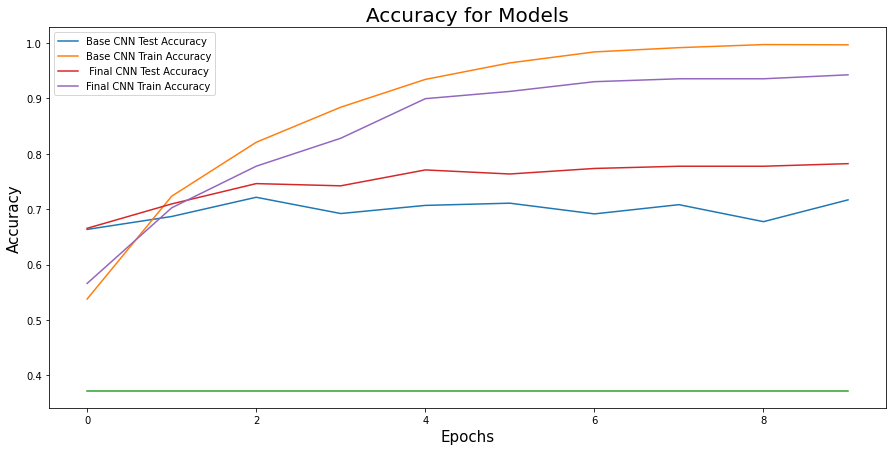

In [32]:
plt.figure(figsize=(15,7))
plt.plot(history6.history['val_accuracy'], label = 'Base CNN Test Accuracy')
plt.plot(history6.history['accuracy'], label = 'Base CNN Train Accuracy')
plt.plot(np.full_like(history6.history['val_accuracy'],history1.history['val_accuracy']))
plt.plot(history13.history['val_accuracy'][0:10], label = ' Final CNN Test Accuracy')
plt.plot(history13.history['accuracy'][0:10], label = 'Final CNN Train Accuracy')
plt.xlabel('Epochs', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.title('Accuracy for Models',size = 20)
plt.legend();

In [54]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import tensorflow

In [34]:
confusion_matrix(test_labels,model13.predict(test_data))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [40]:
y_pred=model13.predict_classes(test_data)
y_pred

array([0, 5, 5, ..., 5, 5, 4])

In [42]:
test_labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [44]:
def val2list(predictions_list):
    predictions = []
    for i in predictions_list:
        temp = [0,0,0,0,0,0]
        temp[i] += 1
        predictions.append(temp)
    return predictions

In [50]:
def list2val(labels_list):
    labels = []
    for sub_list in labels_list:
        for index, value in enumerate(sub_list):
            if value > 0:
                labels.append(index)

    return labels

In [48]:
preds = val2list(y_pred)


In [52]:
labels = list2val(test_labels)


[0, 5, 4]

In [53]:
confusion_matrix(labels,preds)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
plot_confusion_matrix()

In [ ]:
con_mat = tensorflow.math.confusion_matrix(labels=test_labels, predictions=model13.predict(test_data)).numpy()

In [81]:
#learning rate
model14 = Sequential()

model14.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model14.add(MaxPool2D(pool_size = (2, 2)))

model14.add(Flatten())
model14.add(Dense(100, activation = 'relu'))
model14.add(Dense(6, activation = 'softmax'))

early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=1,
                                            verbose=1,
                                            factor=0.25,
                                            min_lr=0.00000001)


model14.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

# fit
history14 = model14.fit(train_data, 
           train_labels, 
           epochs=20,
           validation_data = (test_data, test_labels),
            callbacks=[learning_rate_reduction, early_stop]
          )

Epoch 1/20
220/220 [==============================] - 22s 95ms/step - loss: 1.5489 - accuracy: 0.5663 - val_loss: 1.0361 - val_accuracy: 0.5720
Epoch 2/20
220/220 [==============================] - 22s 98ms/step - loss: 0.7712 - accuracy: 0.7234 - val_loss: 0.9164 - val_accuracy: 0.6540
Epoch 3/20
220/220 [==============================] - 21s 97ms/step - loss: 0.5839 - accuracy: 0.8039 - val_loss: 1.0248 - val_accuracy: 0.6447

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 4/20
220/220 [==============================] - 22s 99ms/step - loss: 0.3723 - accuracy: 0.9002 - val_loss: 0.8140 - val_accuracy: 0.7147
Epoch 5/20
220/220 [==============================] - 22s 100ms/step - loss: 0.3200 - accuracy: 0.9210 - val_loss: 0.8197 - val_accuracy: 0.7133

Epoch 00005: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 6/20
220/220 [==============================] - 22s 100ms/step - loss: 0.2724 - accuracy: 0.9387 - val_loss: 0.8

In [99]:
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from keras.layers import GlobalAveragePooling2D

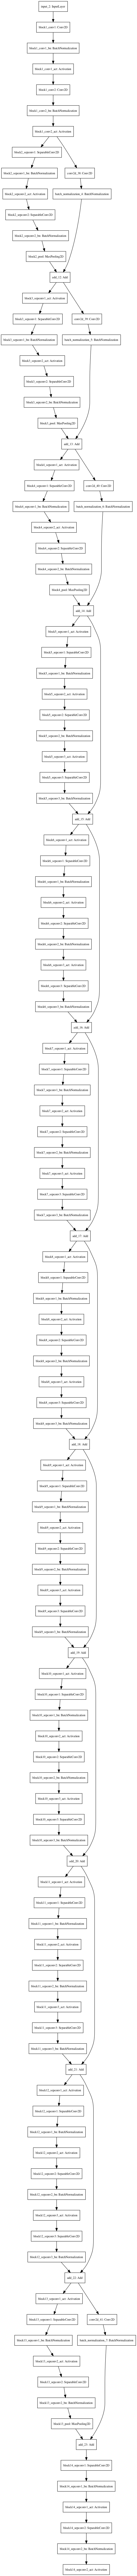

In [105]:
conv_base = Xception(include_top=False, input_shape =(150,150,3)) #downloaded weights
plot_model(conv_base)

In [108]:
preds = conv_base.predict(train_data)

In [92]:
preds

array([[[[0.3955539 , 0.        , 0.3307979 , ..., 0.45767313,
          0.00877208, 0.        ],
         [0.5927586 , 0.        , 0.65701294, ..., 0.6307302 ,
          0.        , 0.        ],
         [0.55746394, 0.        , 0.77497625, ..., 0.57763046,
          0.10485917, 0.        ],
         [0.17373163, 0.        , 0.48241365, ..., 0.33590317,
          0.        , 0.        ],
         [0.        , 0.        , 0.00220764, ..., 0.        ,
          0.        , 0.        ]],

        [[0.7297974 , 0.        , 0.43105733, ..., 0.9263595 ,
          0.        , 0.        ],
         [1.146811  , 0.        , 0.9099723 , ..., 1.4503369 ,
          0.        , 0.        ],
         [1.0010858 , 0.        , 1.1169462 , ..., 1.3189788 ,
          0.        , 0.        ],
         [0.5694949 , 0.        , 0.73780656, ..., 0.8496929 ,
          0.        , 0.        ],
         [0.        , 0.        , 0.04983258, ..., 0.12780946,
          0.        , 0.        ]],

        [[1.0710

In [95]:
y_train_binarized = to_categorical(train_labels)

In [96]:
y_train_binarized

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

In [106]:
train_labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [109]:
top_layer = Sequential()
top_layer.add(Dense(100,activation ='relu'))
top_layer.add(Dense(6, activation='softmax'))

top_layer.compile(loss = 'categorical_crossentropy', optimizer='adam',
                  metrics = ['accuracy'])

In [110]:
history_conv = top_layer.fit(preds, train_labels,epochs = 10)

Epoch 1/10


ValueError: in user code:

    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/anthonyreid/opt/miniconda3/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 6) and (None, 5, 5, 6) are incompatible


In [ ]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

In [ ]:
conv_base = Xception(include_top=True, input_shape =(150,150,3)) #downloaded weights
#add layers from model 13
x = conv_base.output
model13 = Sequential()
x = (Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
x = (MaxPool2D(pool_size = (2, 2)))

# model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
# model13.add(MaxPool2D(pool_size = (2, 2)))

# model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
# model13.add(MaxPool2D(pool_size = (2, 2)))

# model13.add(Flatten())
# model13.add(Dense(100, activation = 'relu'))
# model13.add(Dense(6, activation = 'softmax'))

# early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
#                                             patience=1,
#                                             verbose=1,
#                                             factor=0.25,
#                                             min_lr=0.00000001)

In [ ]:
#augmentation, prebuilt models, app for classifying